<a href="https://colab.research.google.com/github/adalves-ufabc/2020.QS-PLN/blob/main/2020_QS_PLN_Notebook_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2020.QS]**
Prof. Alexandre Donizeti Alves

# **Extração de Dados [Texto]**

---





Neste caderno, vamos cobrir várias fontes de dados de texto e maneiras de extraí-los.


***Free source***

Uma grande quantidade de dados está disponível gratuitamente na Internet. Precisamos apenas simplificar o problema e começar a explorar múltiplas fontes de dados gratuitas.

>• Free APIs (Twitter)

>• Wikipedia

>• United States Government data (https://www.data.gov/)

>• United States Census data (https://www.census.gov/data.html)

>• United States Health care claim data (https://www.healthdata.gov/)

>• Weather Service (https://www.weather.gov/)

>• NASA (https://data.nasa.gov/)

>• The World Bank (https://data.worldbank.org/)

>• Datahub (https://datahub.io/)

>• Microdados ENEM (http://portal.inep.gov.br/microdados)

>• Portal Brasileiro de Dados Abertos (https://dados.gov.br/)

### **01. Coletando dados de texto usando APIs**

O **Twitter** tem uma quantidade gigantesca de dados com muito valor. Há uma quantidade enorme de tweets todos os dias, e cada tweet tem uma história para contar. Quando esses dados são coletados e analisados, fornecem uma enorme quantidade de *insights* sobre uma empresa, produto, serviço etc.

O primeiro passo é fazer login no portal do desenvolvedor do Twitter:

> https://developer.twitter.com/en

Crie seu próprio aplicativo (app) no portal do desenvolvedor do Twitter e obtenha as chaves mencionado abaixo. Depois de ter essas credenciais, você pode começar a baixar dados. 

> 

**Chaves necessárias**:
> *consumer key*: chave associada ao aplicativo (Twitter, Facebook etc.)

> *consumer secret*: senha usada para autenticação com o servidor de autenticação (Twitter, Facebook etc.)

> *access token*: chave dada ao cliente após o sucesso de autenticação das chaves acima

> *access token secret*: senha para a chave de acesso


In [ ]:
# install tweepy
#!pip install tweepy

# import the libraries
import tweepy as tw
from tweepy import OAuthHandler

# credentials
with open('/content/twitter-tokens.txt', 'r') as tfile:
    consumer_key = tfile.readline().strip('\n')
    consumer_secret = tfile.readline().strip('\n')
    access_token = tfile.readline().strip('\n')
    access_token_secret = tfile.readline().strip('\n')

# calling API
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

# provide the query you want to pull the data
query ="ufabc"

# fetching tweets
tweets = api.search(query, count = 10,lang='en', exclude='retweets', tweet_mode='extended')
tweets

[Status(_api=<tweepy.api.API object at 0x7f6c7fca4278>, _json={'created_at': 'Mon Oct 19 17:54:47 +0000 2020', 'id': 1318249247834361857, 'id_str': '1318249247834361857', 'full_text': '@IPSA @thethiagor @JASanahuja @ManzanoCr @ufabc @FNPrefeitos @Oficina_Munic @daroto @GCR_21 @Panderson2588 @ForumFed @IPSA_RC28 @FederalismOrg @EuracFederalism @GlobalActionPW Sorry! Thank you!', 'truncated': False, 'display_text_range': [176, 193], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'IPSA', 'name': 'IPSA', 'id': 8055232, 'id_str': '8055232', 'indices': [0, 5]}, {'screen_name': 'thethiagor', 'name': 'Thiago Rodrigues, PhD', 'id': 1036010452935946243, 'id_str': '1036010452935946243', 'indices': [6, 17]}, {'screen_name': 'JASanahuja', 'name': 'José Antonio Sanahuja', 'id': 1053606029156593664, 'id_str': '1053606029156593664', 'indices': [18, 29]}, {'screen_name': 'ManzanoCr', 'name': 'Cristina Manzano', 'id': 510813892, 'id_str': '510813892', 'indices': [30, 40]},

In [ ]:
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

https://t.co/HrPjYHF55V Sítio arqueológico em caverna mexicana tem os indícios mais antigos da presença de pessoas… https://t.co/p3tq3CX5u2
https://t.co/PpkQvfnV61 #Cachorros farejam o novo #coronavírus. Os animais têm se mostrado capazes de detectar o ar… https://t.co/E0tqp2FsAk
https://t.co/OaTwteH7tB Embraer cria spin-off para projetar carro voador. Com sede nos Estados Unidos, Eve será a r… https://t.co/mbMsnV272Z
Estudos apontam novas perspectivas para o uso de ultrassom em oncologia https://t.co/J6fa9TpxtF
https://t.co/0y6aqpJXpY Análises sugerem que a identidade viking não se limitou à de pessoas com genética escandina… https://t.co/Fzle4oeKNK
Em estágios iniciais da COVID-19, febre pode ser grande aliada contra a doença, afirma estudo… https://t.co/iTDkpf4Dy9
Coronavírus levou as pessoas a tirar a generosidade da gaveta  e a reduzir a competitividade… https://t.co/3bwWgimZss
https://t.co/okZqPcmxyK O biólogo Radovan Borojevic fala de percalços e perspectivas da medicina regener

In [ ]:
user = api.get_user('adalves17')

print(user.screen_name)

adalves17


In [ ]:
print(user.followers_count)

2


In [ ]:
for follower in user.followers():
   print(follower.screen_name)

gersonpech
jmenac


In [ ]:
print(user.friends_count)

15


In [ ]:
for friend in user.friends():
   print(friend.screen_name)

rcprati
dadosdepesquisa
Lab_iMetrics
ciemrevista
NatureIndex
RodrigoCostas1
LudoWaltman
neesjanvaneck
QSS_ISSI
LdaFCosta
BVFAPESP
lutzbornmann
cwtsleiden
PesquisaFapesp
jmenac


**Mais informações em**:

> http://docs.tweepy.org/en/latest/


### **02. Coletando dados a partir de um documento em PDF**


In [ ]:
# install and import all the necessary libraries
!pip install PyPDF2
import PyPDF2

     |████████████████████████████████| 81kB 2.6MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61086 sha256=685c0f55b324475b810cc4e6dc9f24652825da148d6864ce46960a3e2b6e8e42
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [ ]:
# creating a pdf file object
pdf = open("/content/meetingminutes.pdf","rb")

In [ ]:
# creating pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdf)

In [ ]:
# checking number of pages in a pdf file
print(pdfReader.numPages)

19


In [ ]:
# creating a page object
page = pdfReader.getPage(0)

In [ ]:
# finally extracting text from the page
print(page.extractText())

OOFFFFIICCIIAALL  BBOOAARRDD  MMIINNUUTTEESS   Meeting of 
March 7
, 2014
        
     The Board of Elementary and Secondary Education shall provide leadership and 
create policies for education that expand opportunities for children, empower 
families and communities, and advance Louisiana in an increasingly 
competitive glob
al market.
 BOARD 
 of ELEMENTARY
 and 
 SECONDARY
 EDUCATION
  


In [ ]:
# closing the pdf file
pdf.close()

**Mais exemplos em**:

> https://github.com/mstamy2/PyPDF2

### **03. Coletando dados a partir de um documento Word**

In [ ]:
#install and import library (Python3)
!pip install python-docx
import docx

     |████████████████████████████████| 5.5MB 3.3MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.10-cp36-none-any.whl size=184491 sha256=3a114424c786da72630c74922856ed3f3bae921b4d2cc16821315320b6390bb0
  Stored in directory: /root/.cache/pip/wheels/18/0b/a0/1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built python-docx


In [ ]:
# creating word reader object
doc = docx.Document('/content/demo.docx')

In [ ]:
len(doc.paragraphs)

7

In [ ]:
doc.paragraphs[0].text

'Document Title'

In [ ]:
doc.paragraphs[1].text

'A plain paragraph with some bold and some italic'

In [ ]:
len(doc.paragraphs[1].runs)

5

In [ ]:
doc.paragraphs[1].runs[0].text

'A plain paragraph with'

In [ ]:
doc.paragraphs[1].runs[1].text

' some '

In [ ]:
doc.paragraphs[1].runs[2].text

'bold'

In [ ]:
doc.paragraphs[1].runs[3].text

' and some '

In [ ]:
doc.paragraphs[1].runs[4].text

'italic'

In [ ]:
def getText(filename):
   doc = docx.Document(filename)
   fullText = []
   for para in doc.paragraphs:
      fullText.append(para.text)
   return '\n'.join(fullText)

In [ ]:
print(getText('/content/demo.docx'))

Document Title
A plain paragraph with some bold and some italic
Heading, level 1
Intense quote
first item in unordered list
first item in ordered list




**Mais exemplos em**:
> https://python-docx.readthedocs.io/en/latest/index.html

### **04. Criando um documento Word**

In [ ]:
from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('Document Title', 0)

p = document.add_paragraph('A plain paragraph having some ')
p.add_run('bold').bold = True
p.add_run(' and some ')
p.add_run('italic.').italic = True

document.add_heading('Heading, level 1', level=1)
document.add_paragraph('Intense quote', style='Intense Quote')

document.add_paragraph(
    'first item in unordered list', style='List Bullet'
)
document.add_paragraph(
    'first item in ordered list', style='List Number'
)

document.add_picture('/content/monty-truth.png', width=Inches(1.25))

records = (
    (3, '101', 'Spam'),
    (7, '422', 'Eggs'),
    (4, '631', 'Spam, spam, eggs, and spam')
)

table = document.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Qty'
hdr_cells[1].text = 'Id'
hdr_cells[2].text = 'Desc'
for qty, id, desc in records:
    row_cells = table.add_row().cells
    row_cells[0].text = str(qty)
    row_cells[1].text = id
    row_cells[2].text = desc

document.add_page_break()

document.save('/content/demo2.docx')

**Mais exemplos em**:
> https://python-docx.readthedocs.io/en/latest/index.html

### **05. Coletando dados armazenados no formato JSON**

O JSON (*JavaScript Object Notation*) é um formato de arquivo para manter e trocar informações legíveis pelas pessoas. O arquivo contém apenas texto e usa a extensão *.json*.

O JSON é um formato que armazena informações estruturadas e é principalmente usado para transferir dados entre um servidor e um cliente.

O arquivo é basicamente uma alternativa simples e mais leve ao XML (*Extensive Markup Language*), que tem funções similares.

In [ ]:
import requests
import json

r = requests.get("https://quotes.rest/qod.json")
res = r.json()
print(json.dumps(res, indent = 4)) 

{
    "success": {
        "total": 1
    },
    "contents": {
        "quotes": [
            {
                "quote": "When a man is an upright contender, only real people are bound to be around; but if he is a downright pretender, then fake people surround and always abound to be found.",
                "length": "169",
                "author": "Anuj Somany",
                "tags": [
                    "associates",
                    "empowerment",
                    "fake-friends",
                    "followers",
                    "inspire",
                    "people",
                    "person",
                    "pretender",
                    "real",
                    "true-friends"
                ],
                "category": "inspire",
                "language": "en",
                "date": "2020-10-20",
                "permalink": "https://theysaidso.com/quote/anuj-somany-when-a-man-is-an-upright-contender-only-real-people-are-bound-to-be",
         

In [ ]:
# extract contents
q = res['contents']['quotes'][0] 
q

{'author': 'Anuj Somany',
 'background': 'https://theysaidso.com/img/qod/qod-inspire.jpg',
 'category': 'inspire',
 'date': '2020-10-20',
 'id': 'sCHiMScG2LnYFGs4GUXaTAeF',
 'language': 'en',
 'length': '169',
 'permalink': 'https://theysaidso.com/quote/anuj-somany-when-a-man-is-an-upright-contender-only-real-people-are-bound-to-be',
 'quote': 'When a man is an upright contender, only real people are bound to be around; but if he is a downright pretender, then fake people surround and always abound to be found.',
 'tags': ['associates',
  'empowerment',
  'fake-friends',
  'followers',
  'inspire',
  'people',
  'person',
  'pretender',
  'real',
  'true-friends'],
 'title': 'Inspiring Quote of the day'}

In [ ]:
# extract only quote
print(q['quote'], '\n--', q['author'])

When a man is an upright contender, only real people are bound to be around; but if he is a downright pretender, then fake people surround and always abound to be found. 
-- Anuj Somany


### **06. Coletando dados a partir de páginas HTML**

In [ ]:
!pip install bs4
import urllib.request as urllib2 
from bs4 import BeautifulSoup

In [ ]:
response = urllib2.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing')
html_doc = response.read()

In [ ]:
# parsing the HTML file
soup = BeautifulSoup(html_doc, 'html.parser')

# formating the parsed html file
strhtm = soup.prettify()

# print few lines
print (strhtm[:1000])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Natural language processing - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"5ce1a16e-2c73-4c87-8ffd-d9bdcf4ecde7","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Natural_language_processing","wgTitle":"Natural language processing","wgCurRevisionId":983013403,"wgRevisionId":983013403,"wgArticleId":21652,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: location","Articles with short description","Short description matches Wikidata","All accuracy dispu

In [ ]:
# extracting tag value
print(soup.title)
print(soup.title.string)
print(soup.a.string)
print(soup.b.string)

<title>Natural language processing - Wikipedia</title>
Natural language processing - Wikipedia
None
Natural language processing


In [ ]:
# extracting all instances of a particular tag
for x in soup.find_all('a'): 
  print(x.string)

None
None
None
None
None
None
None
None
Despite the popularity of machine learning in NLP research, symbolic methods are still (2020) commonly used

None
None
None
Since the neural turn, statistical methods in NLP research have been largely replaced by neural networks. However, they continue to be relevant for contexts in which statistical interpretability and transparency is required.

None
The following is a list of some of the most commonly researched tasks in natural language processing. Some of these tasks have direct real-world applications, while others more commonly serve as subtasks that are used to aid in solving larger tasks.

Though natural language processing tasks are closely intertwined, they can be subdivided into categories for convenience. A coarse division is given below.

None
None
None
None
None


In [ ]:
# extracting all text of a particular tag
for x in soup.find_all('p'): 
  print(x.text)

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.

Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation.

Natural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, a task that involves the automated interpretation and generation of natural language, but at the time not articulated as a problem separate from artificial intelligence.

The premise of symbolic NLP is well-summarized by John Searle's Chinese room experiment: Given a collection of rules (e.g., a Chinese phrasebook, with questions and 

### **07. Análise de texto usando Expressões Regulares**

In [ ]:
# import library
import re

# run the split query
re.split('\s+','I like this book.')

['I', 'like', 'this', 'book.']

In [ ]:
# extracing email IDs
doc = "For more details please mail us at: xyz@abc.com, pqr@mno.com"

addresses = re.findall(r'[\w\.-]+@[\w\.-]+', doc)
for address in addresses: 
  print(address)

xyz@abc.com
pqr@mno.com


In [ ]:
# replacing email IDs
doc = "For more details please mail us at xyz@abc.com"

new_email_address = re.sub(r'([\w\.-]+)@([\w\.-]+)', r'pqr@mno.com', doc)
print(new_email_address)

For more details please mail us at pqr@mno.com


In [ ]:
# import library
import re
import requests

# url you want to extract
url = 'https://www.gutenberg.org/files/2638/2638-0.txt'

# function to extract
def get_book(url):

 # sends a http request to get the text from project Gutenberg
 raw = requests.get(url).text
 
 # discards the metadata from the beginning of the book
 start = re.search(r"\*\*\* START OF THIS PROJECT GUTENBERG EBOOK .* \*\*\*",raw ).end()
 
 # discards the metadata from the end of the book
 stop = re.search(r"II", raw).start()
 
 # keeps the relevant text
 text = raw[start:stop]
 return text

# processing
def preprocess(sentence): 
 return re.sub('[^A-Za-z0-9.]+' , ' ', sentence).lower()

# calling the above function
book = get_book(url)

processed_book = preprocess(book)
print(processed_book)

 produced by martin adamson david widger with corrections by andrew sly the idiot by fyodor dostoyevsky translated by eva martin part i i. towards the end of november during a thaw at nine o clock one morning a train on the warsaw and petersburg railway was approaching the latter city at full speed. the morning was so damp and misty that it was only with great difficulty that the day succeeded in breaking and it was impossible to distinguish anything more than a few yards away from the carriage windows. some of the passengers by this particular train were returning from abroad but the third class carriages were the best filled chiefly with insignificant persons of various occupations and degrees picked up at the different stations nearer town. all of them seemed weary and most of them had sleepy eyes and a shivering expression while their complexions generally appeared to have taken on the colour of the fog outside. when day dawned two passengers in one of the third class carriages fou

In [ ]:
# perform some exploratory data analysis on this data using regex

# count number of times "the" is appeared in the book
len(re.findall(r'the', processed_book))

8

In [ ]:
# replace "i" with "I"
processed_book = re.sub(r'\si\s', " I ", processed_book)
print(processed_book)

 produced by martin adamson david widger with corrections by andrew sly the idiot by fyodor dostoyevsky translated by eva martin part I i. towards the end of november during a thaw at nine o clock one morning a train on the warsaw and petersburg railway was approaching the latter city at full speed. the morning was so damp and misty that it was only with great difficulty that the day succeeded in breaking and it was impossible to distinguish anything more than a few yards away from the carriage windows. some of the passengers by this particular train were returning from abroad but the third class carriages were the best filled chiefly with insignificant persons of various occupations and degrees picked up at the different stations nearer town. all of them seemed weary and most of them had sleepy eyes and a shivering expression while their complexions generally appeared to have taken on the colour of the fog outside. when day dawned two passengers in one of the third class carriages fou

In [ ]:
# find all occurance of text in the format "abc--xyz"
re.findall(r'[a-zA-Z0-9]*--[a-zA-Z0-9]*', book)

['ironical--it',
 'malicious--smile',
 'fur--or',
 'astrachan--overcoat',
 'it--the',
 'Italy--was',
 'malady--a',
 'money--and',
 'little--to',
 'No--Mr',
 'is--where',
 'I--I',
 'I--',
 '--though',
 'crime--we',
 'or--judge',
 'gaiters--still',
 '--if',
 'through--well',
 'say--through',
 'however--and',
 'Epanchin--oh',
 'too--at',
 'was--and',
 'Andreevitch--that',
 'everyone--that',
 'reduce--or',
 'raise--to',
 'listen--and',
 'history--but',
 'individual--one',
 'yes--I',
 'but--',
 't--not',
 'me--then',
 'perhaps--',
 'Yes--those',
 'me--is',
 'servility--if',
 'Rogojin--hereditary',
 'citizen--who',
 'least--goodness',
 'memory--but',
 'latter--since',
 'Rogojin--hung',
 'him--I',
 'anything--she',
 'old--and',
 'you--scarecrow',
 'certainly--certainly',
 'father--I',
 'Barashkoff--I',
 'see--and',
 'everything--Lebedeff',
 'about--he',
 'now--I',
 'Lihachof--',
 'Zaleshoff--looking',
 'old--fifty',
 'so--and',
 'this--do',
 'day--not',
 'that--',
 'do--by',
 'know--my',
 'il

### **08. Manipulando strings**

In [ ]:
String_v1 = "I am exploring NLP"

# to extract particular character or range of characters from string
print(String_v1[0])

# to extract exploring
print(String_v1[5:14])

String_v2 = String_v1.replace("exploring", "learning")
print(String_v2)

I
exploring
I am learning NLP


In [ ]:
s1 = "nlp"
s2 = "machine learning"
s3 = s1+s2
print(s3)

nlpmachine learning


In [ ]:
# use find function to fetch the starting index value of the sub string in whole string.

var = "I am learning NLP"
f = "learn"
var.find(f)

5

### **09. *Web Scraping***

*Web scraping* é um termo para se referir ao uso de um programa para fazer download e processar conteúdos da Web.

**Download de uma página Web com a função `requests.get()`**

In [188]:
import requests

response = requests.get('http://www.gutenberg.org/files/1112/1112.txt')
type(response)


requests.models.Response

In [189]:
response.status_code == requests.codes.ok

True

In [ ]:
len(response.text)

179410

In [190]:
print(response.text[:250])

The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare


*******************************************************************
THIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A
TIME WHEN PROOFING METHODS AND TOOL


In [193]:
# uma excecao sera gerada caso ocorra algum erro no download do arquivo
response.raise_for_status()

playFile = open('RomeoAndJuliet.txt', 'wb')

# cada porcao tem o tipo de dados byte e eh
# possivel especificar quantos bytes cada porcao tera
for chunk in response.iter_content(100000):
  playFile.write(chunk)

playFile.close()

**Fazendo parse de HTML com o módulo `BeautifulSoup`**

O `BeautifulSoup` é um módulo usado para extrair informações de uma página HTML 

In [ ]:
import requests, bs4

response = requests.get('https://nostarch.com')
response.raise_for_status()

page = bs4.BeautifulSoup(response.text, 'html.parser')
type(page)

bs4.BeautifulSoup

In [ ]:
# encontrando um elemento com o metodo select()
pElems = page.select('p')
type(pElems)

list

In [ ]:
len(pElems)

64

In [ ]:
str(pElems[0])

'<p>We are currently shipping with some delays. Please see our <a href="/orderfaq.htm" style="text-decoration:underline;" target="_blank">FAQ.</a></p>'

In [ ]:
pElems[0].getText()

'We are currently shipping with some delays. Please see our FAQ.'

In [ ]:
str(pElems[2])

'<p class="cart-block-items collapsed uc-cart-empty">There are no products in your shopping cart.</p>'

In [ ]:
pElems[2].getText()

'There are no products in your shopping cart.'

In [ ]:
# obtendo dados dos atributos de um elemento
import bs4

soup = bs4.BeautifulSoup(open('/content/example.html'), 'html.parser')
spanElem = soup.select('span')[0]
str(spanElem)

'<span id="author">Al Sweigart</span>'

In [ ]:
spanElem.get('id')

'author'

In [ ]:
spanElem.attrs

{'id': 'author'}

**Busca no Google**

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import urllib.parse
from urllib.parse import urlparse

def googleSearch(query):
    g_clean = [ ] 
    url = 'https://www.google.com/search?client=ubuntu&channel=fs&q={}&ie=utf-8&oe=utf-8'.format(query) 
    try:
            html = requests.get(url)
            if html.status_code==200:
                soup = BeautifulSoup(html.text, 'lxml')
                a = soup.find_all('a') 
                for i in a:
                    k = i.get('href')
                    try:
                        m = re.search("(?P<url>https?://[^\s]+)", k)
                        n = m.group(0)
                        rul = n.split('&')[0]
                        domain = urlparse(rul)
                        if(re.search('google.com', domain.netloc)):
                            continue
                        else:
                            g_clean.append(rul)
                    except:
                        continue
    except Exception as ex:
            print(str(ex))
    finally:
            return g_clean

In [ ]:
googleSearch("ufabc")

['https://www.ufabc.edu.br/',
 'https://www.ufabc.edu.br/boletim-monitoramento-pandemia',
 'https://proec.ufabc.edu.br/',
 'https://www.ufabc.edu.br/ufabc-na-midia',
 'https://inova.ufabc.edu.br/',
 'http://ri.ufabc.edu.br/en/',
 'https://en.wikipedia.org/wiki/Federal_University_of_ABC',
 'https://en.wikipedia.org/wiki/Federal_University_of_ABC%23History_and_expansion',
 'https://en.wikipedia.org/wiki/Federal_University_of_ABC%23Undergraduate_teaching',
 'https://en.wikipedia.org/wiki/Federal_University_of_ABC%23Research',
 'https://en.wikipedia.org/wiki/Federal_University_of_ABC%23Infrastructure',
 'https://www.usnews.com/education/best-global-universities/universidade-federal-do-abc-ufabc-528920',
 'https://www.timeshighereducation.com/world-university-rankings/federal-university-abc-ufabc',
 'https://www.facebook.com/ufabc/',
 'https://www.facebook.com/ufabc/photos/%3Ftab%3Dalbum%26album_id%3D469862354902',
 'https://www.researchgate.net/institution/Universidade_Federal_do_ABC_UFABC

**Referência**:

> https://medium.com/@ajaypanthagani/heres-how-you-can-scrape-google-search-results-with-python-fa45d09a95a2


**Web Scraping**

In [ ]:
!pip install BeautifulSoup4

In [ ]:
import requests 
import bs4 
import pandas as pd 
  
# make requests from webpage 
url = 'https://www.worldometers.info/coronavirus/country/india/'
result = requests.get(url) 
  
# creating soup object 
soup = bs4.BeautifulSoup(result.text,'lxml') 
  
# searching div tags having maincounter-number class 
cases = soup.find_all('div' ,class_= 'maincounter-number') 
 
# list to store number of cases 
data = [] 
  
# find the span and get data from it 
for i in cases: 
    span = i.find('span') 
    data.append(span.string) 
  
# dispaly number of cases  
print(data) 
    
# creating dataframe 
df = pd.DataFrame({"CoronaData": data}) 
  
# naming the coloumns 
df.index = ['TotalCases', ' Deaths', 'Recovered'] 

# exporting data into Excel 
df.to_csv('Corona_Data.csv')

['7,594,736 ', '115,236', '6,730,617']


**Referência**:

> https://www.geeksforgeeks.org/web-scraping-coronavirus-data-into-ms-excel/


In [ ]:
# importing libraries 
from bs4 import BeautifulSoup as bs
import requests 
    
# method to get the info 
def get_info(country_name): 
      
    # creating url using country name 
    url = "https://www.worldometers.info/coronavirus/country/" + country_name + "/"
      
    # getting the request from url  
    data = requests.get(url) 
  
    # converting the text  
    soup = bs(data.text, 'html.parser')    
      
    # finding meta info for cases 
    cases = soup.find_all("div", class_ = "maincounter-number") 
      
    # getting total cases number 
    total = cases[0].text 
      
    # filtering it 
    total = total[1 : len(total) - 2] 
       
    # getting recovered cases number 
    recovered = cases[2].text 
      
    # filtering it 
    recovered = recovered[1 : len(recovered) - 1] 
      
    # getting death cases number 
    deaths = cases[1].text 
      
    # filtering it 
    deaths = deaths[1 : len(deaths) - 1] 
      
    # saving details in dictionary 
    ans ={'Total Cases' : total, 'Recovered Cases' : recovered, 
                                 'Total Deaths' : deaths} 
      
    # returnng the dictionary 
    return ans 
   
# setting country name 
country_name = "us"
  
# calling the get_info method 
us = get_info(country_name) 
  
# printing the results for us 
print("Cases in United States") 
for i, j in us.items(): 
    print(i + " : " + j) 
      
print("----------------------------")   
# setting country name to Brazil 
country_name = "brazil"
  
# calling the get_info method 
brazil = get_info(country_name) 
  
# printing the results for us 
print("Cases in Brazil") 
for i, j in brazil.items(): 
    print(i + " : " + j) 


Cases in United States
Total Cases : 8,453,816
Recovered Cases : 5,496,771
Total Deaths : 225,209
----------------------------
Cases in Brazil
Total Cases : 7,594,736
Recovered Cases : 6,730,617
Total Deaths : 115,236


**Referência**:

> https://www.geeksforgeeks.org/python-details-of-coronavirus-cases-in-various-countries/

***Web Scraping* [*Top 250 movies from the IMDB*]**
> https://www.imdb.com/chart/top?ref_=nv_mv_250.

In [ ]:
from bs4 import BeautifulSoup
import requests
import csv

In [ ]:
url = "https://www.imdb.com/chart/top?ref_=nv_mv_250"

page = requests.get(url)

soup = BeautifulSoup(page.text, "html.parser")

raw_html = soup.find("tbody", {"class": "lister-list"}).findAll("tr")


In [ ]:
def main_fun():
    movies_list = []
    for html in raw_html:
        title = html.find("td", {"class":"titleColumn"}).find("a").get_text()

        rating = html.find("td", {"class":"ratingColumn imdbRating"}).find("strong").get_text()
        rating = float(rating)

        raw_list = [title, rating]
        movies_list.append(raw_list)

    recomendation(movies_list)
    create_csv(movies_list)

In [ ]:
def recomendation(m_list):
    print("Enter you rating for recomendation:")
    user_rating = input()
    user_rating = float(user_rating)
    for x in range(len(m_list)):
        if m_list[x][1]>user_rating:
            print(m_list[x][0])

In [ ]:
def create_csv(movies):
    with open('movies.csv', 'w') as csvfile:
        writer = csv.writer(csvfile)
        row = ['Name', 'Rating']
        writer.writerow(row)
        for x in range(len(movies)):
            row = movies[x]
            writer.writerow(row)
    csvfile.close()

In [ ]:
main_fun()

Enter you rating for recomendation:
8.8
The Shawshank Redemption
The Godfather
The Godfather: Part II
The Dark Knight
12 Angry Men
Schindler's List
The Lord of the Rings: The Return of the King


**Referência**:
> https://youtu.be/qstdzOAbt78

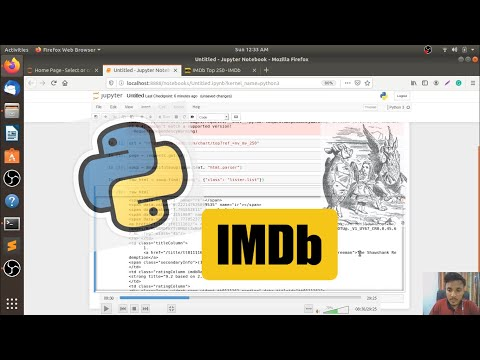

In [ ]:
from IPython.display import YouTubeVideo
display(YouTubeVideo('qstdzOAbt78', width=550, height=310))

### **10. Coletando dados a partir de arquivos CSV**

Um arquivo **CSV** (*Comma Separated Values*) é um tipo de arquivo de texto simples que usa uma estrutura específica para organizar dados tabulares. Por ser um arquivo de texto simples, ele pode conter apenas dados de texto reais - em outras palavras, caracteres ASCII ou Unicode imprimíveis.

A estrutura de um arquivo CSV é fornecida por seu nome. Normalmente, os arquivos CSV usam uma vírgula para separar cada valor de dados específico. Esta é a aparência dessa estrutura:


> **CSV**
---
> column 1 name,column 2 name, column 3 name

> first row data 1,first row data 2,first row data 3

> second row data 1,second row data 2,second row data 3


In [ ]:
import csv

exampleFile = open('/content/example.csv')
exampleReader = csv.reader(exampleFile)
exampleData = list(exampleReader)
exampleData

[['4/5/2014 13:34', 'Apples', '73'],
 ['4/5/2014 3:41', 'Cherries', '85'],
 ['4/6/2014 12:46', 'Pears', '14'],
 ['4/8/2014 8:59', 'Oranges', '52'],
 ['4/10/2014 2:07', 'Apples', '152'],
 ['4/10/2014 18:10', 'Bananas', '23'],
 ['4/10/2014 2:40', 'Strawberries', '98']]

In [ ]:
print (exampleData[0][0] )
print (exampleData[0][1] )
print (exampleData[5][1] )

4/5/2014 13:34
Apples
Bananas


In [ ]:
# reading Data from reader Objects in a for Loop

import csv

exampleFile = open('/content/example.csv')
exampleReader = csv.reader(exampleFile)

for row in exampleReader:
   print('Row #' + str(exampleReader.line_num) + ' ' + str(row))

Row #1 ['4/5/2014 13:34', 'Apples', '73']
Row #2 ['4/5/2014 3:41', 'Cherries', '85']
Row #3 ['4/6/2014 12:46', 'Pears', '14']
Row #4 ['4/8/2014 8:59', 'Oranges', '52']
Row #5 ['4/10/2014 2:07', 'Apples', '152']
Row #6 ['4/10/2014 18:10', 'Bananas', '23']
Row #7 ['4/10/2014 2:40', 'Strawberries', '98']


In [ ]:
import csv

outputFile = open('output.csv', 'w', newline='')
outputWriter = csv.writer(outputFile)

# retorna o numero de caracters gravados
outputWriter.writerow(['spam', 'eggs', 'bacon', 'ham'])

outputWriter.writerow(['Hello, world!', 'eggs', 'bacon', 'ham'])
outputWriter.writerow([1, 2, 3.141592, 4])

outputFile.close()

In [ ]:
# delimiter and line terminator Keyword Arguments
import csv

csvFile = open('example.tsv', 'w', newline='')
csvWriter = csv.writer(csvFile, delimiter='\t', lineterminator='\n\n')

csvWriter.writerow(['apples', 'oranges', 'grapes'])
csvWriter.writerow(['eggs', 'bacon', 'ham'])
csvWriter.writerow(['spam', 'spam', 'spam', 'spam', 'spam', 'spam'])

csvFile.close()

In [ ]:
import csv
exampleFile = open('/content/exampleWithHeader.csv')
exampleDictReader = csv.DictReader(exampleFile)
for row in exampleDictReader:
  print(row['Timestamp'], row['Fruit'], row['Quantity'])

4/5/2014 13:34 Apples 73
4/5/2014 3:41 Cherries 85
4/6/2014 12:46 Pears 14
4/8/2014 8:59 Oranges 52
4/10/2014 2:07 Apples 152
4/10/2014 18:10 Bananas 23
4/10/2014 2:40 Strawberries 98


In [ ]:
import csv

outputFile = open('output2.csv', 'w', newline='')
outputDictWriter = csv.DictWriter(outputFile, ['Name', 'Pet', 'Phone'])
outputDictWriter.writeheader()
outputDictWriter.writerow({'Name': 'Alice', 'Pet': 'cat', 'Phone': '555-1234'})
outputDictWriter.writerow({'Name': 'Bob', 'Phone': '555-9999'})
outputDictWriter.writerow({'Phone': '555-5555', 'Name': 'Carol', 'Pet':'dog'})

outputFile.close()

In [ ]:
import pandas

df = pandas.read_csv('output2.csv', delimiter=',')
print(df)

    Name  Pet     Phone
0  Alice  cat  555-1234
1    Bob  NaN  555-9999
2  Carol  dog  555-5555


In [ ]:
df.head()

Name  Pet     Phone
0  Alice  cat  555-1234
1    Bob  NaN  555-9999
2  Carol  dog  555-5555

In [ ]:
print(type(df['Name'][0]))

<class 'str'>


In [ ]:
import pandas

df = pandas.read_csv('output2.csv', index_col='Phone')
print(df)


           Name  Pet
Phone               
555-1234  Alice  cat
555-9999    Bob  NaN
555-5555  Carol  dog


In [ ]:
import pandas as pd

df = pandas.read_csv('/content/exampleWithHeader.csv')
print(df)

df2 = df[['Fruit', 'Quantity']]

df2.to_csv('output3.csv')

         Timestamp         Fruit  Quantity
0   4/5/2014 13:34        Apples        73
1    4/5/2014 3:41      Cherries        85
2   4/6/2014 12:46         Pears        14
3    4/8/2014 8:59       Oranges        52
4   4/10/2014 2:07        Apples       152
5  4/10/2014 18:10       Bananas        23
6   4/10/2014 2:40  Strawberries        98


### **11. Extração de dados a partir de *tweets***

In [ ]:
import tweepy as tw
import pandas as pd

In [ ]:
with open('twitter-tokens.txt', 'r') as tfile:
    consumer_key = tfile.readline().strip('\n')
    consumer_secret = tfile.readline().strip('\n')
    access_token = tfile.readline().strip('\n')
    access_token_secret = tfile.readline().strip('\n')

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth)

public_tweets = api.home_timeline()

In [ ]:
for tweet in public_tweets:
    print(tweet.text)

Can the frequency of a signal be defined and measured in an instantaneous sense?  This interesting question has bee… https://t.co/gwHmMc7LSV
A tally of mass destruction
https://t.co/wlOBcXGUac https://t.co/fETJyfkIW8
https://t.co/HrPjYHF55V Sítio arqueológico em caverna mexicana tem os indícios mais antigos da presença de pessoas… https://t.co/p3tq3CX5u2
https://t.co/PpkQvfnV61 #Cachorros farejam o novo #coronavírus. Os animais têm se mostrado capazes de detectar o ar… https://t.co/E0tqp2FsAk
https://t.co/OaTwteH7tB Embraer cria spin-off para projetar carro voador. Com sede nos Estados Unidos, Eve será a r… https://t.co/mbMsnV272Z
Estudos apontam novas perspectivas para o uso de ultrassom em oncologia https://t.co/J6fa9TpxtF
https://t.co/0y6aqpJXpY Análises sugerem que a identidade viking não se limitou à de pessoas com genética escandina… https://t.co/Fzle4oeKNK
Em estágios iniciais da COVID-19, febre pode ser grande aliada contra a doença, afirma estudo… https://t.co/iTDkpf4Dy9
Coron

In [ ]:
tweet._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Mon Oct 19 14:00:00 +0000 2020',
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/l2FgjAGE3Y',
    'expanded_url': 'https://twitter.com/NatureIndex/status/1318190165286776832/photo/1',
    'id': 1317049658909331458,
    'id_str': '1317049658909331458',
    'indices': [61, 84],
    'media_url': 'http://pbs.twimg.com/media/EkcZr87XEAIAb__.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/EkcZr87XEAIAb__.jpg',
    'sizes': {'large': {'h': 405, 'resize': 'fit', 'w': 607},
     'medium': {'h': 405, 'resize': 'fit', 'w': 607},
     'small': {'h': 405, 'resize': 'fit', 'w': 607},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/l2FgjAGE3Y'}],
  'symbols': [],
  'urls': [{'display_url': 'go.nature.com/31d6xxO',
    'expanded_url': 'https://go.nature.com/31d6xxO',
    'indices': [37, 60],
    'url': 'https://t.co/ViRBdjIn9B'}],
  'user_mentions': []}

In [ ]:
tweet._json.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [ ]:
#query_search= "#BRACIS" 
query_search= "#BRACIS"  + " -filter:retweets"

# o curso eh dinamico
cursor_tweets = tw.Cursor( api.search, q = query_search).items(10)

for tweet in cursor_tweets:
    print(tweet.created_at)
    print(tweet.text)

2020-10-16 21:56:37
E o vídeo das apresentações do #BRACIS estão disponíveis em https://t.co/whDmCc1LMU
2020-10-16 21:55:06
Os proceedings do #BRACIS 2020 já estão online: Volume I https://t.co/GWuPm7yEXi e Volume II https://t.co/wzFg7vglJv
2020-10-16 13:43:51
Have you ever seen Text Data Augmentation? We proposed PRE-trained Data AugmenTOR (PREDATOR) method to improve Text… https://t.co/xkTGccNl7C


In [ ]:
twkeys = tweet._json.keys()
twkeys

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [ ]:
tweets_dict = {}
tweets_dict = tweets_dict.fromkeys(twkeys)
tweets_dict

{'contributors': None,
 'coordinates': None,
 'created_at': None,
 'entities': None,
 'favorite_count': None,
 'favorited': None,
 'geo': None,
 'id': None,
 'id_str': None,
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': None,
 'lang': None,
 'metadata': None,
 'place': None,
 'possibly_sensitive': None,
 'retweet_count': None,
 'retweeted': None,
 'source': None,
 'text': None,
 'truncated': None,
 'user': None}

In [ ]:
query_search= "#ENEM"  + " -filter:retweets" 
cursor_tweets = tw.Cursor(api.search,
                          since = "2020-10-12",
                          until = "2020-10-19",
                          q = query_search).items(50)                        

In [ ]:
for tweet in cursor_tweets:
    for key in tweets_dict.keys():
        try:
            twvalue = tweet._json[key]
            tweets_dict[key].append(twvalue)
        except KeyError:
            twvalue = ""
            if(tweets_dict[key] is None):
                tweets_dict[key] = [twvalue]
            else:
                tweets_dict[key].append(twvalue)
        except:
            tweets_dict[key] = [twvalue]
        print("tweets_dict[key]: {} - tweet[key]: {}".format(tweets_dict[key],  twvalue))

tweets_dict[key]: ['Sun Oct 18 23:00:53 +0000 2020'] - tweet[key]: Sun Oct 18 23:00:53 +0000 2020
tweets_dict[key]: [1317963895341010955] - tweet[key]: 1317963895341010955
tweets_dict[key]: ['1317963895341010955'] - tweet[key]: 1317963895341010955
tweets_dict[key]: ['#crase #dicaderedação #dicadeportuguês\n\n#enem #vestibulares #vestibular #fuvest #vunesp #unicamp #redação https://t.co/XjvJVHbLkh'] - tweet[key]: #crase #dicaderedação #dicadeportuguês

#enem #vestibulares #vestibular #fuvest #vunesp #unicamp #redação https://t.co/XjvJVHbLkh
tweets_dict[key]: [False] - tweet[key]: False
tweets_dict[key]: [{'hashtags': [{'text': 'crase', 'indices': [0, 6]}, {'text': 'dicaderedação', 'indices': [7, 21]}, {'text': 'dicadeportuguês', 'indices': [22, 38]}, {'text': 'enem', 'indices': [40, 45]}, {'text': 'vestibulares', 'indices': [46, 59]}, {'text': 'vestibular', 'indices': [60, 71]}, {'text': 'fuvest', 'indices': [72, 79]}, {'text': 'vunesp', 'indices': [80, 87]}, {'text': 'unicamp', 'indice

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
tweets_dict

{'contributors': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'coordinates': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  {'coordinates': [-53.0, -11.0], 'type': 'Point'},
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'created_at': ['Sun Oct 18 23:00:53 +0000 2020',
  'Sun Oct 18 22:21:47 +0000 2020',
  'Sun Oct 18 21:22:06 +0000 2020',
 

In [ ]:
dfTweets = pd.DataFrame.from_dict(tweets_dict)
dfTweets.head()

created_at                   id  ... possibly_sensitive lang
0  Sun Oct 18 23:00:53 +0000 2020  1317963895341010955  ...              False  und
1  Sun Oct 18 22:21:47 +0000 2020  1317954055679971329  ...              False   pt
2  Sun Oct 18 21:22:06 +0000 2020  1317939033809571840  ...              False   pt
3  Sun Oct 18 21:01:00 +0000 2020  1317933724022022145  ...              False   pt
4  Sun Oct 18 20:45:49 +0000 2020  1317929902935519235  ...              False   pt

[5 rows x 25 columns]

In [ ]:
dfTweets.text

0     #crase #dicaderedação #dicadeportuguês\n\n#ene...
1     "Vender a primeira vez não é tão difícil, a co...
2     Quer saber como ficou a nossa grade semanal de...
3     Competência 1 saiu do chat \n\nTem dificuldade...
4     Confira a Resolução -&gt; https://t.co/7G6e9gb...
5     Aí vocês que votaram pro Enem ocorrer em janei...
6     Eu ou mim\n#Enem #Enem2020 #ResumosEnem #Educa...
7     Video novo no canal do YouTube, Inscreva-se e ...
8     Que hoje é #diadomedico #diadamedica, vocês já...
9     ✍ Anote na agenda e compartilhe.\n⠀\n🗣 GrupoZa...
10    Denotação e conotação\n#Enem #Enem2020 #Resumo...
11    SOS EXATAS 🗣️🗣️\nSejam Bem vindos\n⏩Resolução ...
12    Imagina essas frutas em sala de aula?\n\n#enem...
13    Resolva o máximo de questões possíveis!!\n.\nE...
14    Estamos cheios de orgulho por termos um aprova...
15    Errada: Haviam muitos candidatos com qualifica...
16    Mande um Whatsapp para 31 988606003 #ENEM #VES...
17    Onde ou aonde\n#Enem #Enem2020 #ResumosEne

In [ ]:
dfTweets.to_csv("tweetsENEM.csv", index=False)

In [ ]:
import pandas as pd

dfENEM = pd.read_csv("tweetsENEM.csv")
dfENEM

In [ ]:
dfENEM.sort_values(by=['favorite_count'], ascending=False)

created_at                   id  ...  possibly_sensitive lang
39  Sat Oct 17 08:42:54 +0000 2020  1317385588618727424  ...                 NaN   pt
34  Sat Oct 17 12:41:15 +0000 2020  1317445569368018949  ...               False   pt
43  Fri Oct 16 23:31:02 +0000 2020  1317246705688059904  ...               False   pt
45  Fri Oct 16 22:49:24 +0000 2020  1317236229793042439  ...               False  und
8   Sun Oct 18 18:01:22 +0000 2020  1317888519264784384  ...                 NaN   pt
30  Sat Oct 17 15:01:35 +0000 2020  1317480887605395457  ...               False   pt
46  Fri Oct 16 22:29:56 +0000 2020  1317231329684094977  ...               False   pt
18  Sun Oct 18 01:21:39 +0000 2020  1317636929878396928  ...                 NaN   pt
31  Sat Oct 17 13:28:20 +0000 2020  1317457418884886528  ...               False   pt
32  Sat Oct 17 13:13:21 +0000 2020  1317453648373403648  ...               False   pt
25  Sat Oct 17 20:13:00 +0000 2020  1317559257273933827  ...               False  und
33  Sat Oct 17 12:47:03 +0000 2020  1317447030831284224  ...               False   pt
27  Sat Oct 17 17:34:49 +0000 2020  1317519450170601472  ...               False   pt
28  Sat Oct 17 16:00:28 +0000 2020  1317495703300702209  ...               False   pt
29  Sat Oct 17 15:40:49 +0000 2020  1317490759361318912  ...               False   pt
37  Sat Oct 17 10:45:48 +0000 2020  1317416517768798208  ...               False   pt
36  Sat Oct 17 11:01:09 +0000 2020  1317420380341084163  ...               False   pt
24  Sat Oct 17 20:45:49 +0000 2020  1317567515967574018  ...               False   pt
38  Sat Oct 17 10:29:34 +0000 2020  1317412431983972352  ...               False   es
40  Sat Oct 17 03:19:34 +0000 2020  1317304216227020800  ...               False   pt
44  Fri Oct 16 23:00:59 +0000 2020  1317239143404101633  ...               False   pt
47  Fri Oct 16 21:16:49 +0000 2020  1317212929666711552  ...               False   pt
48  Fri Oct 16 21:01:34 +0000 2020  1317209091681509378  ...               False   pt
26  Sat Oct 17 19:37:41 +0000 2020  1317550370764279809  ...               False   pt
49  Fri Oct 16 20:49:25 +0000 2020  1317206035195625478  ...               False   pt
16  Sun Oct 18 10:51:33 +0000 2020  1317780349062172673  ...               False   de
1   Sun Oct 18 22:21:47 +0000 2020  1317954055679971329  ...               False   pt
11  Sun Oct 18 16:24:45 +0000 2020  1317864203949047808  ...               False   pt
2   Sun Oct 18 21:22:06 +0000 2020  1317939033809571840  ...               False   pt
3   Sun Oct 18 21:01:00 +0000 2020  1317933724022022145  ...               False   pt
4   Sun Oct 18 20:45:49 +0000 2020  1317929902935519235  ...               False   pt
5   Sun Oct 18 20:06:03 +0000 2020  1317919893572956162  ...                 NaN   pt
6   Sun Oct 18 18:39:40 +0000 2020  1317898155741110273  ...               False   pt
7   Sun Oct 18 18:38:17 +0000 2020  1317897807664205827  ...               False   pt
42  Sat Oct 17 00:02:28 +0000 2020  1317254616736727042  ...               False   pt
41  Sat Oct 17 02:30:49 +0000 2020  1317291950421250048  ...               False   pt
9   Sun Oct 18 17:55:56 +0000 2020  1317887149958627328  ...               False   pt
10  Sun Oct 18 16:44:59 +0000 2020  1317869294202605568  ...               False   pt
12  Sun Oct 18 15:40:48 +0000 2020  1317853145016524801  ...               False   pt
23  Sat Oct 17 21:01:03 +0000 2020  1317571347673993219  ...               False   pt
13  Sun Oct 18 14:40:14 +0000 2020  1317837900474699777  ...               False   pt
35  Sat Oct 17 11:16:52 +0000 2020  1317424334231699457  ...               False   pt
14  Sun Oct 18 13:01:13 +0000 2020  1317812980935950337  ...               False   pt
15  Sun Oct 18 11:01:08 +0000 2020  1317782763941089281  ...               False   pt
17  Sun Oct 18 08:58:06 +0000 2020  1317751799974141952  ...               False   pt
19  Sat Oct 17 23:22:54 +0000 2020  1317607047903535104  ...        

In [ ]:
dfENEM.text

0     #crase #dicaderedação #dicadeportuguês\n\n#ene...
1     "Vender a primeira vez não é tão difícil, a co...
2     Quer saber como ficou a nossa grade semanal de...
3     Competência 1 saiu do chat \n\nTem dificuldade...
4     Confira a Resolução -&gt; https://t.co/7G6e9gb...
5     Aí vocês que votaram pro Enem ocorrer em janei...
6     Eu ou mim\n#Enem #Enem2020 #ResumosEnem #Educa...
7     Video novo no canal do YouTube, Inscreva-se e ...
8     Que hoje é #diadomedico #diadamedica, vocês já...
9     ✍ Anote na agenda e compartilhe.\n⠀\n🗣 GrupoZa...
10    Denotação e conotação\n#Enem #Enem2020 #Resumo...
11    SOS EXATAS 🗣️🗣️\nSejam Bem vindos\n⏩Resolução ...
12    Imagina essas frutas em sala de aula?\n\n#enem...
13    Resolva o máximo de questões possíveis!!\n.\nE...
14    Estamos cheios de orgulho por termos um aprova...
15    Errada: Haviam muitos candidatos com qualifica...
16    Mande um Whatsapp para 31 988606003 #ENEM #VES...
17    Onde ou aonde\n#Enem #Enem2020 #ResumosEne

In [ ]:
import csv
import nltk
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
dfENEM['tokenized_text'] = dfENEM.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')

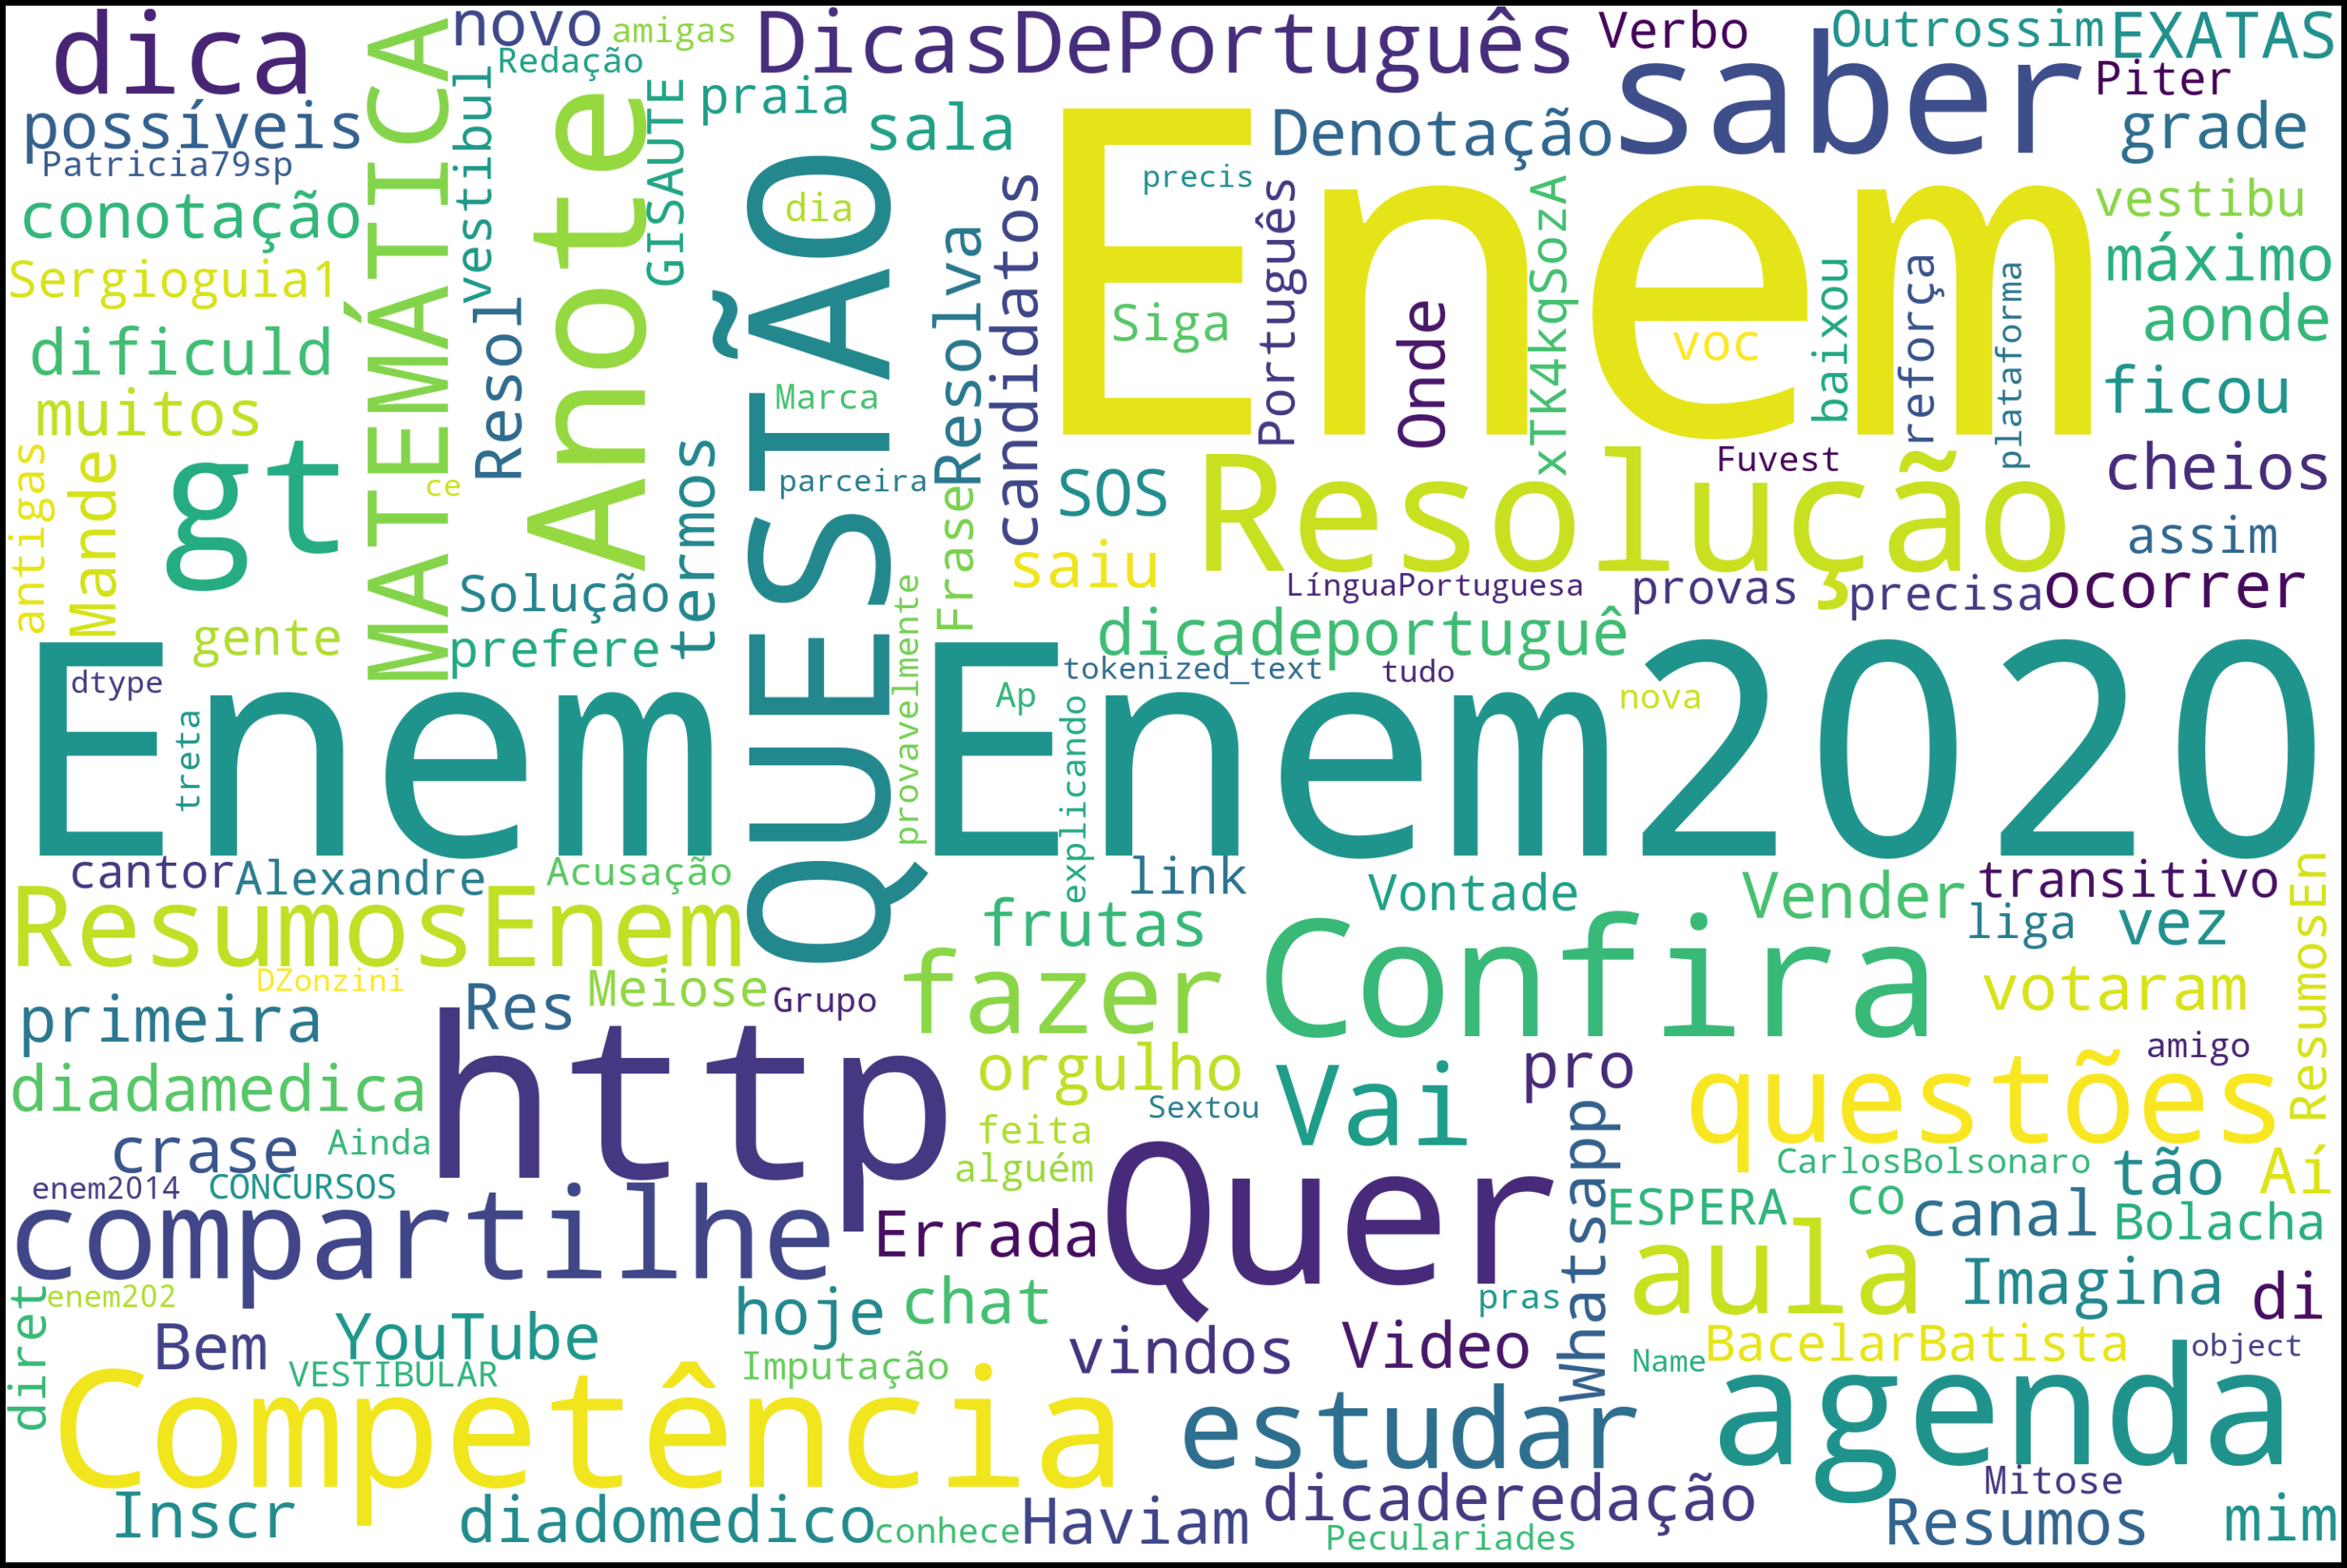

In [ ]:
text = dfENEM.tokenized_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Referência**:

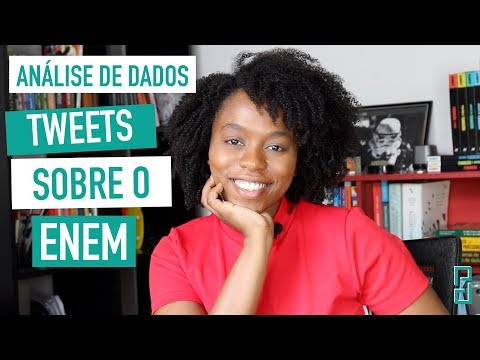

In [ ]:
from IPython.display import YouTubeVideo
display(YouTubeVideo('RssGfmtyn4A', width=550, height=310))

### **12. Coletando dados a partir de planilhas do Google**

In [ ]:
# https://gspread.readthedocs.io/en/latest/user-guide.html

# instalar a biblioteca gspread 
!pip install --upgrade gspread

# --upgrade -> instala a versao mais recente

  Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
planilha = gc.open('municipios')

In [ ]:
pagina = planilha.sheet1
pagina.row_values(1)

['codigo_ibge', 'nome', 'latitude', 'longitude', 'capital', 'codigo_uf']

In [ ]:
pagina.acell('A1').value

'codigo_ibge'

In [ ]:
pagina.cell(1,5).value

'capital'

In [ ]:
pagina.update('G1','TESTE')

# apagar
pagina.update('G1','')

{'spreadsheetId': '1A3LgNatMTy6SH8IarzAHW_-T3IZ6yUMcoOZld9AGSJU',
 'updatedCells': 1,
 'updatedColumns': 1,
 'updatedRange': 'dados!G1',
 'updatedRows': 1}

In [ ]:
import pandas as pd

municipios = pd.DataFrame(pagina.get_all_records())
municipios.head()

codigo_ibge                 nome  latitude  longitude  capital  codigo_uf
0      5200050      Abadia de Goiás  -167.573   -494.412        0         52
1      3100104  Abadia dos Dourados  -184.831   -473.916        0         31
2      5200100            Abadiânia   -16.197   -487.057        0         52
3      3100203               Abaeté  -191.551   -454.444        0         31
4      1500107           Abaetetuba  -172.183   -488.788        0         15

In [ ]:
rondonia = municipios.query('codigo_uf==11')
rondonia.head()

codigo_ibge                     nome  ...  capital  codigo_uf
131      1100015    Alta Floresta D'Oeste  ...        0         11
145      1100379  Alto Alegre dos Parecis  ...        0         11
158      1100403             Alto Paraíso  ...        0         11
179      1100346         Alvorada D'Oeste  ...        0         11
381      1100023                Ariquemes  ...        0         11

[5 rows x 6 columns]

In [ ]:
# obter o numero de linhas e colunas
rondonia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 131 to 5517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   codigo_ibge  52 non-null     int64  
 1   nome         52 non-null     object 
 2   latitude     52 non-null     float64
 3   longitude    52 non-null     float64
 4   capital      52 non-null     int64  
 5   codigo_uf    52 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 2.8+ KB


In [ ]:
# cria uma pagina
municipios_rondonia = planilha.add_worksheet('Rondônia',rows=52, cols=6)

In [ ]:
municipios_rondonia.update([rondonia.columns.values.tolist()] + rondonia.values.tolist())

{'spreadsheetId': '1A3LgNatMTy6SH8IarzAHW_-T3IZ6yUMcoOZld9AGSJU',
 'updatedCells': 318,
 'updatedColumns': 6,
 'updatedRange': "'Rondônia'!A1:F53",
 'updatedRows': 53}

In [ ]:
rondonia.columns.values.tolist()

['codigo_ibge', 'nome', 'latitude', 'longitude', 'capital', 'codigo_uf']

In [ ]:
rondonia.values.tolist()

[[1100015, "Alta Floresta D'Oeste", -119.283, -619.953, 0, 11],
 [1100379, 'Alto Alegre dos Parecis', -12.132, -61.835, 0, 11],
 [1100403, 'Alto Paraíso', -971.429, -633.188, 0, 11],
 [1100346, "Alvorada D'Oeste", -113.463, -622.847, 0, 11],
 [1100023, 'Ariquemes', -990.571, -630.325, 0, 11],
 [1100452, 'Buritis', -101.943, -638.324, 0, 11],
 [1100031, 'Cabixi', -134.945, -60.552, 0, 11],
 [1100601, 'Cacaulândia', -10.349, -629.043, 0, 11],
 [1100049, 'Cacoal', -114.343, -614.562, 0, 11],
 [1100700, 'Campo Novo de Rondônia', -105.712, -636.266, 0, 11],
 [1100809, 'Candeias do Jamari', -87.907, -637.005, 0, 11],
 [1100908, 'Castanheiras', -114.253, -619.482, 0, 11],
 [1100056, 'Cerejeiras', -13.187, -608.168, 0, 11],
 [1100924, 'Chupinguaia', -125.611, -608.877, 0, 11],
 [1100064, 'Colorado do Oeste', -131.174, -605.454, 0, 11],
 [1100072, 'Corumbiara', -129.551, -608.947, 0, 11],
 [1100080, 'Costa Marques', -124.367, -64.228, 0, 11],
 [1100940, 'Cujubim', -936.065, -625.846, 0, 11],
 [

**Referência**:

Analise DADOS do Google Sheets com Python usando Google COLAB

https://youtu.be/8vKvsLTLDzs

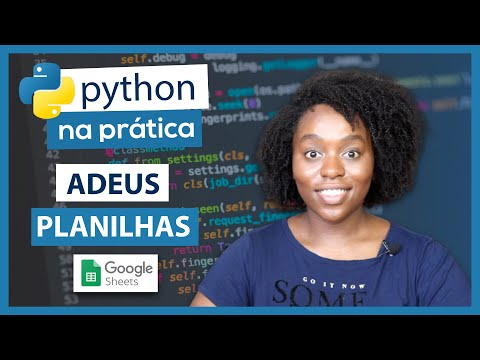

In [ ]:
from IPython.display import YouTubeVideo
display(YouTubeVideo('8vKvsLTLDzs', width=550, height=310))

### **13. Coletando dados eleitorais**

Lendo um arquivo **CSV** a partir do **Google Drive**

>

**Repositório de dados eleitorais**:

> https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

cand_BR = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Aula 08/consulta_cand_2020_BRASIL.csv", sep=';', encoding='ISO-8859-1')
cand_BR

DT_GERACAO  ... ST_CANDIDATO_INSERIDO_URNA
0       18/10/2020  ...                        NÃO
1       18/10/2020  ...                        NÃO
2       18/10/2020  ...                        NÃO
3       18/10/2020  ...                        NÃO
4       18/10/2020  ...                        NÃO
...            ...  ...                        ...
554973  18/10/2020  ...                        NÃO
554974  18/10/2020  ...                        NÃO
554975  18/10/2020  ...                        NÃO
554976  18/10/2020  ...                        NÃO
554977  18/10/2020  ...                        NÃO

[554978 rows x 63 columns]

In [ ]:
cand_BR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554978 entries, 0 to 554977
Data columns (total 63 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   DT_GERACAO                     554978 non-null  object
 1   HH_GERACAO                     554978 non-null  object
 2   ANO_ELEICAO                    554978 non-null  int64 
 3   CD_TIPO_ELEICAO                554978 non-null  int64 
 4   NM_TIPO_ELEICAO                554978 non-null  object
 5   NR_TURNO                       554978 non-null  int64 
 6   CD_ELEICAO                     554978 non-null  int64 
 7   DS_ELEICAO                     554978 non-null  object
 8   DT_ELEICAO                     554978 non-null  object
 9   TP_ABRANGENCIA                 554978 non-null  object
 10  SG_UF                          554978 non-null  object
 11  SG_UE                          554978 non-null  int64 
 12  NM_UE                          554978 non-nu

In [ ]:
cand_BR['ST_REELEICAO'].value_counts()

N    531316
S     23662
Name: ST_REELEICAO, dtype: int64

In [ ]:
# porcentagem em decimal
cand_BR['ST_REELEICAO'].value_counts(normalize=True)

N    0.957364
S    0.042636
Name: ST_REELEICAO, dtype: float64

In [ ]:
# porcentagem
cand_BR['ST_REELEICAO'].value_counts(normalize=True)*100

N    95.736408
S     4.263592
Name: ST_REELEICAO, dtype: float64

In [ ]:
cand_BR['DS_GRAU_INSTRUCAO'].value_counts(normalize=True)

ENSINO MÉDIO COMPLETO            0.381033
SUPERIOR COMPLETO                0.243044
ENSINO FUNDAMENTAL INCOMPLETO    0.127816
ENSINO FUNDAMENTAL COMPLETO      0.122097
ENSINO MÉDIO INCOMPLETO          0.049634
SUPERIOR INCOMPLETO              0.044782
LÊ E ESCREVE                     0.031562
ANALFABETO                       0.000032
Name: DS_GRAU_INSTRUCAO, dtype: float64

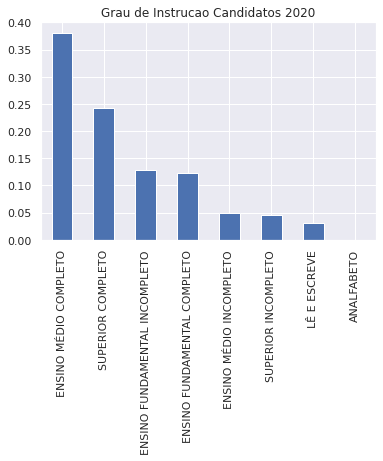

In [ ]:
import seaborn as sns
sns.set()

# use ;
cand_BR['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).plot(kind='bar', title='Grau de Instrucao Candidatos 2020');

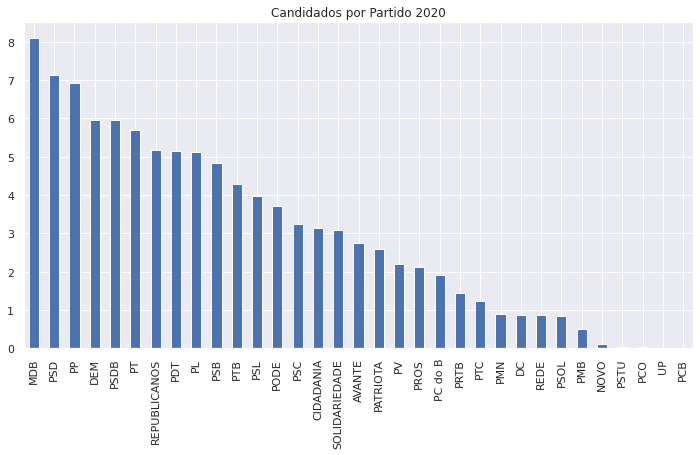

In [ ]:
(100 * cand_BR['SG_PARTIDO'].value_counts(normalize=True)).plot(kind='bar', figsize=(12,6), title='Candidados por Partido 2020');

In [ ]:
cand_BR['NM_URNA_CANDIDATO'].str.contains('BOLSONARO').value_counts()

False    554886
True         89
Name: NM_URNA_CANDIDATO, dtype: int64

In [ ]:
cand_BR[cand_BR['NM_URNA_CANDIDATO'].str.contains('BOLSONARO') == True]

DT_GERACAO  ... ST_CANDIDATO_INSERIDO_URNA
5634    18/10/2020  ...                        NÃO
10253   18/10/2020  ...                        NÃO
10434   18/10/2020  ...                        SIM
12176   18/10/2020  ...                        SIM
14901   18/10/2020  ...                        NÃO
...            ...  ...                        ...
531091  18/10/2020  ...                        SIM
545973  18/10/2020  ...                        SIM
549827  18/10/2020  ...                        NÃO
552845  18/10/2020  ...                        NÃO
554656  18/10/2020  ...                        SIM

[89 rows x 63 columns]

In [ ]:
cand_RJ = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Aula 08/consulta_cand_2020_RJ.csv", sep=';', encoding='ISO-8859-1')
cand_RJ

DT_GERACAO  ... ST_CANDIDATO_INSERIDO_URNA
0      18/10/2020  ...                        SIM
1      18/10/2020  ...                        SIM
2      18/10/2020  ...                        SIM
3      18/10/2020  ...                        SIM
4      18/10/2020  ...                        NÃO
...           ...  ...                        ...
26347  18/10/2020  ...                        NÃO
26348  18/10/2020  ...                        NÃO
26349  18/10/2020  ...                        NÃO
26350  18/10/2020  ...                        SIM
26351  18/10/2020  ...                        NÃO

[26352 rows x 63 columns]

In [ ]:
cand_RJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26352 entries, 0 to 26351
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   DT_GERACAO                     26352 non-null  object
 1   HH_GERACAO                     26352 non-null  object
 2   ANO_ELEICAO                    26352 non-null  int64 
 3   CD_TIPO_ELEICAO                26352 non-null  int64 
 4   NM_TIPO_ELEICAO                26352 non-null  object
 5   NR_TURNO                       26352 non-null  int64 
 6   CD_ELEICAO                     26352 non-null  int64 
 7   DS_ELEICAO                     26352 non-null  object
 8   DT_ELEICAO                     26352 non-null  object
 9   TP_ABRANGENCIA                 26352 non-null  object
 10  SG_UF                          26352 non-null  object
 11  SG_UE                          26352 non-null  int64 
 12  NM_UE                          26352 non-null  object
 13  C

In [ ]:
cand_RJ['ST_REELEICAO'].value_counts(normalize=True)*100

N    97.931846
S     2.068154
Name: ST_REELEICAO, dtype: float64

In [ ]:
cand_RJ[cand_RJ['SG_PARTIDO']=='MDB']['DS_GRAU_INSTRUCAO'].value_counts(normalize=True)*100

ENSINO MÉDIO COMPLETO            40.780142
SUPERIOR COMPLETO                21.187943
ENSINO FUNDAMENTAL COMPLETO      13.563830
ENSINO FUNDAMENTAL INCOMPLETO    12.322695
ENSINO MÉDIO INCOMPLETO           5.496454
SUPERIOR INCOMPLETO               5.230496
LÊ E ESCREVE                      1.418440
Name: DS_GRAU_INSTRUCAO, dtype: float64

In [ ]:
cand_RJ[cand_RJ['SG_PARTIDO']=='NOVO']['DS_GRAU_INSTRUCAO'].value_counts(normalize=True)*100

SUPERIOR COMPLETO              86.885246
SUPERIOR INCOMPLETO             6.557377
ENSINO MÉDIO INCOMPLETO         3.278689
ENSINO MÉDIO COMPLETO           1.639344
ENSINO FUNDAMENTAL COMPLETO     1.639344
Name: DS_GRAU_INSTRUCAO, dtype: float64